In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
%matplotlib inline
from datetime import datetime
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

In [76]:
root = '/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/corrected/'

In [77]:
df_list = {}
for filename in glob.glob(os.path.join(root, '*.csv')):
   with open(os.path.join(os.getcwd(), filename), 'r') as f:
      print(f.name)
      df_list[str(str((f.name.split('/')[-1]).lower()).split('_')[0])] = pd.read_csv(f)

/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/corrected/ranchi.csv
/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/corrected/mumbai.csv
/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/corrected/kolkata.csv
/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/corrected/srinagar.csv


In [78]:
df_list

{'kolkata.csv':         PRECTOTCORR    RH2M      PS  WS2M    T2M             Datetime
 0               0.0   89.50  101.38  1.20  13.30  2010-01-01 00:00:00
 1               0.0   95.00  101.34  1.22  12.45  2010-01-01 01:00:00
 2               0.0  100.00  101.32  1.23  11.56  2010-01-01 02:00:00
 3               0.0  100.00  101.31  1.30  10.79  2010-01-01 03:00:00
 4               0.0  100.00  101.35  1.42  10.19  2010-01-01 04:00:00
 ...             ...     ...     ...   ...    ...                  ...
 105211          0.0   87.81  101.82  1.34  15.77  2022-01-01 19:00:00
 105212          0.0   89.38  101.86  1.41  15.15  2022-01-01 20:00:00
 105213          0.0   90.56  101.86  1.43  14.65  2022-01-01 21:00:00
 105214          0.0   91.75  101.88  1.44  14.28  2022-01-01 22:00:00
 105215          0.0   93.31  101.82  1.52  13.85  2022-01-01 23:00:00
 
 [105216 rows x 6 columns],
 'mumbai.csv':         PRECTOTCORR   RH2M      PS  WS2M    T2M             Datetime
 0               0.

In [79]:
df = df_list['ranchi.csv']
df.describe()

,PRECTOTCORR,RH2M,PS,WS2M,T2M
count,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000
mean,0.164638,63.160639,94.019818,1.718749,23.362612
std,0.529832,26.862028,0.558627,15.164555,7.277224
min,0.000000,4.120000,91.870000,-999.000000,1.050000
25%,0.000000,41.310000,93.560000,1.060000,18.760000
50%,0.000000,67.810000,94.060000,1.560000,23.940000
75%,0.080000,87.310000,94.500000,2.630000,27.610000
max,18.540000,100.000000,95.340000,10.940000,44.270000


In [80]:
df

,PRECTOTCORR,RH2M,PS,WS2M,T2M,Datetime
0,0.0,83.06,94.54,1.17,8.24,2010-01-01 00:00:00
1,0.0,85.31,94.51,1.19,7.57,2010-01-01 01:00:00
2,0.0,87.12,94.48,1.22,6.94,2010-01-01 02:00:00
3,0.0,88.19,94.47,1.24,6.40,2010-01-01 03:00:00
4,0.0,88.56,94.48,1.26,5.94,2010-01-01 04:00:00
...,...,...,...,...,...,...
105211,0.0,92.69,95.01,1.28,11.15,2022-01-01 19:00:00
105212,0.0,95.12,95.05,1.25,10.31,2022-01-01 20:00:00
105213,0.0,97.31,95.08,1.23,9.55,2022-01-01 21:00:00
105214,0.0,98.62,95.06,1.19,9.08,2022-01-01 22:00:00


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a876c3cd0>,
      dtype=object)

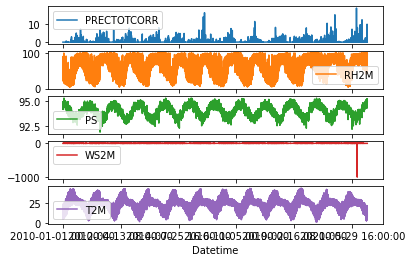

In [81]:
df.set_index('Datetime')[['PRECTOTCORR', 'RH2M', 'PS', 'WS2M', 'T2M']].plot(subplots=True)

In [82]:
df.head()

,PRECTOTCORR,RH2M,PS,WS2M,T2M,Datetime
0,0.0,83.06,94.54,1.17,8.24,2010-01-01 00:00:00
1,0.0,85.31,94.51,1.19,7.57,2010-01-01 01:00:00
2,0.0,87.12,94.48,1.22,6.94,2010-01-01 02:00:00
3,0.0,88.19,94.47,1.24,6.40,2010-01-01 03:00:00
4,0.0,88.56,94.48,1.26,5.94,2010-01-01 04:00:00


In [83]:
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df_temp = df

In [84]:
df_temp['Year'] = pd.DatetimeIndex(df_temp['Datetime']).year

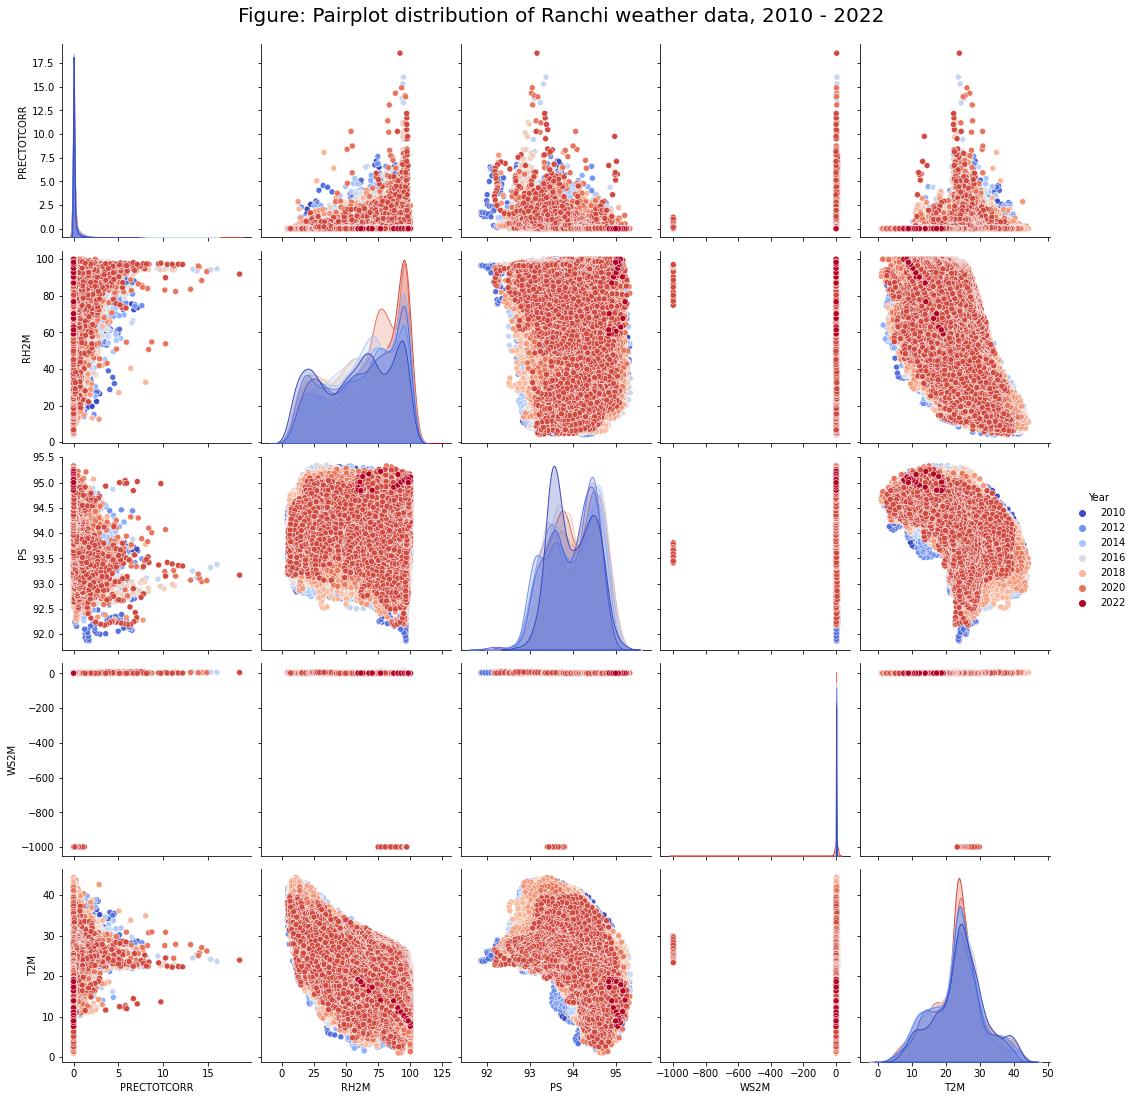

In [85]:
sns.pairplot(
    df_temp,
    height=3,
    vars=[
        "PRECTOTCORR",
        "RH2M",
        "PS",
        "WS2M",
        "T2M",
    ],
    hue="Year",
    palette="coolwarm"
)
plt.suptitle("Figure: Pairplot distribution of Ranchi weather data, 2010 - 2022", fontsize=20, y=1.02)
plt.show()

## RAINFALL

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


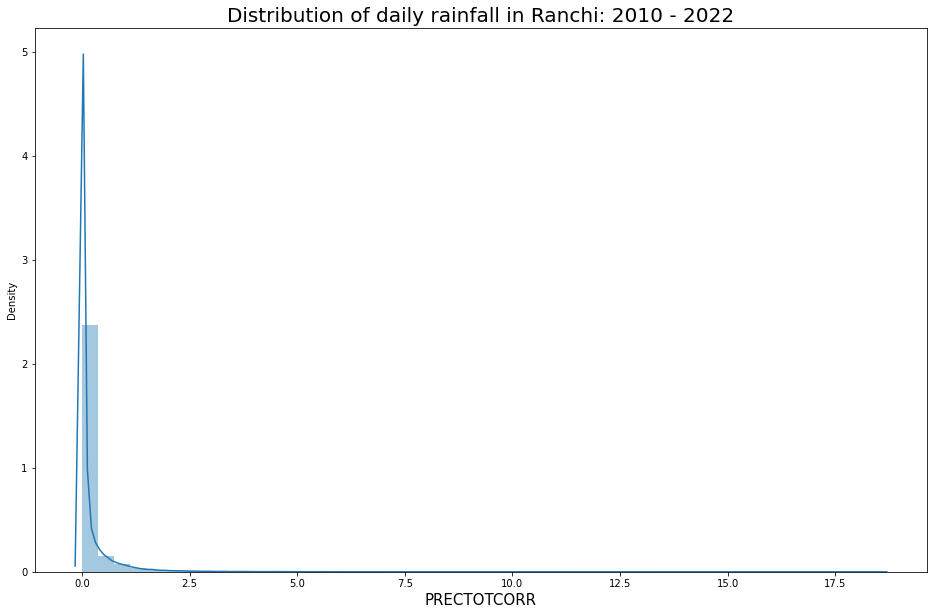

In [86]:
plt.figure(figsize=(16,10))
sns.distplot(df['PRECTOTCORR'])
plt.title('Distribution of daily rainfall in Ranchi: 2010 - 2022', fontsize=20)
plt.xlabel("PRECTOTCORR", fontsize=15)
plt.show()

#### SKEWNESS AND KURTOSIS

Skewness is a measure of the degree of distortion in a dataset. A symmetrical dataset with a normal distribution will have a skewness value of 0.

Kurtosis is a measure of the outliers in the distribution. 

In the case of the daily rainfall column, we see that the data is highly skewed (skewness score greater than 1) to the right due to days where there are unusual amounts of rain. There's no rain for about half the time as well.

The kurtosis score is also high (a normal distribution has a kurtosis of three), indicating the presence of a considerable number of outliers.

In [87]:
print("Skewness: %f" % df['PRECTOTCORR'].skew())
print("Kurtosis: %f" % df['PRECTOTCORR'].kurt())

Skewness: 8.496917
Kurtosis: 127.208412


#### Using Isolation Forest To Detect Anomalies In Daily Rainfall Data



In [88]:
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
!pip install -U scikit-learn
!pip install pyod

In [89]:
isolation_forest = IsolationForest( n_estimators=500, n_jobs=-1, random_state=42, contamination=0.1)

isolation_forest.fit(df_temp["PRECTOTCORR"].values.reshape(-1, 1))

IsolationForest(contamination=0.1, n_estimators=500, n_jobs=-1, random_state=42)

In [90]:
rain = np.linspace(
    df_temp["PRECTOTCORR"].min(),
    df_temp["PRECTOTCORR"].max(),
    len(df_temp),
).reshape(-1, 1)

anomaly_score_rain = isolation_forest.decision_function(rain)

outlier_rain = isolation_forest.predict(rain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


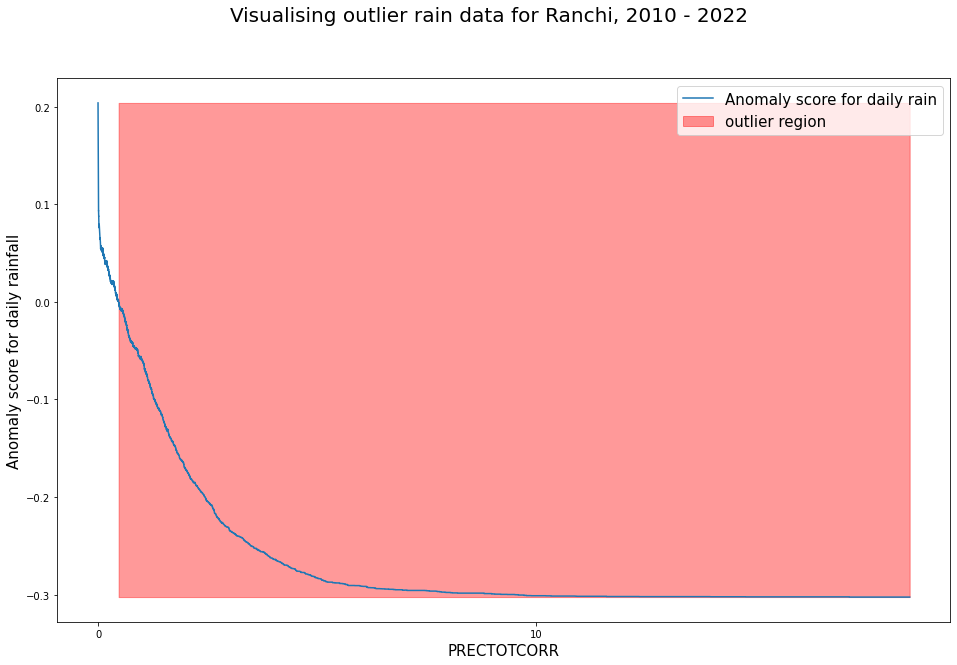

In [91]:
plt.figure(figsize=(16, 10))
plt.plot(rain, anomaly_score_rain, label="Anomaly score for daily rain")
plt.fill_between(
    rain.T[0],
    np.min(anomaly_score_rain),
    np.max(anomaly_score_rain),
    where=outlier_rain == -1,
    color="r",
    alpha=0.4,
    label="outlier region",
)
plt.legend(fontsize=15)
plt.ylabel("Anomaly score for daily rainfall", fontsize=15)
plt.xlabel("PRECTOTCORR", fontsize=15)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MultipleLocator(10))

plt.suptitle("Visualising outlier rain data for Ranchi, 2010 - 2022", fontsize=20)
plt.show()

In [92]:
# finding where the outlier region begins
idx = np.argwhere(np.diff(np.sign(anomaly_score_rain))).flatten()
rain[idx]

array([[0.46960129],
       [0.46995371],
       [0.47030614]])

In [93]:
df[df["PRECTOTCORR"] > 0.46995371].count()[0]

10579

## TEMPERATURE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


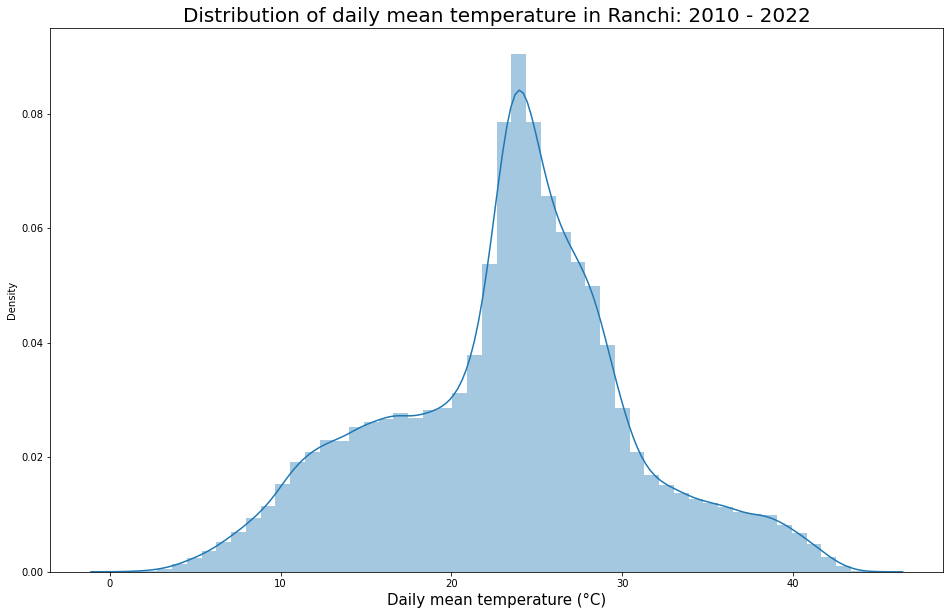

In [94]:
plt.figure(figsize=(16,10))
sns.distplot(df["T2M"])
plt.title('Distribution of daily mean temperature in Ranchi: 2010 - 2022', fontsize=20)
plt.xlabel("Daily mean temperature (°C)", fontsize=15)
plt.show()

In [95]:
print("Skewness: %f" % df["T2M"].skew())
print("Kurtosis: %f" % df["T2M"].kurt())

Skewness: -0.075469
Kurtosis: -0.025190


In [96]:
isolation_forest = IsolationForest( n_estimators=500, n_jobs=-1, random_state=42, contamination=0.1
)

isolation_forest.fit(df_temp["T2M"].values.reshape(-1, 1))

IsolationForest(contamination=0.1, n_estimators=500, n_jobs=-1, random_state=42)

In [97]:
max_temp = np.linspace(
    df_temp["T2M"].min(),
    df_temp["T2M"].max(),
    len(df_temp),
).reshape(-1, 1)

anomaly_score_maxtemp = isolation_forest.decision_function(max_temp)

outlier_maxtemp = isolation_forest.predict(max_temp)

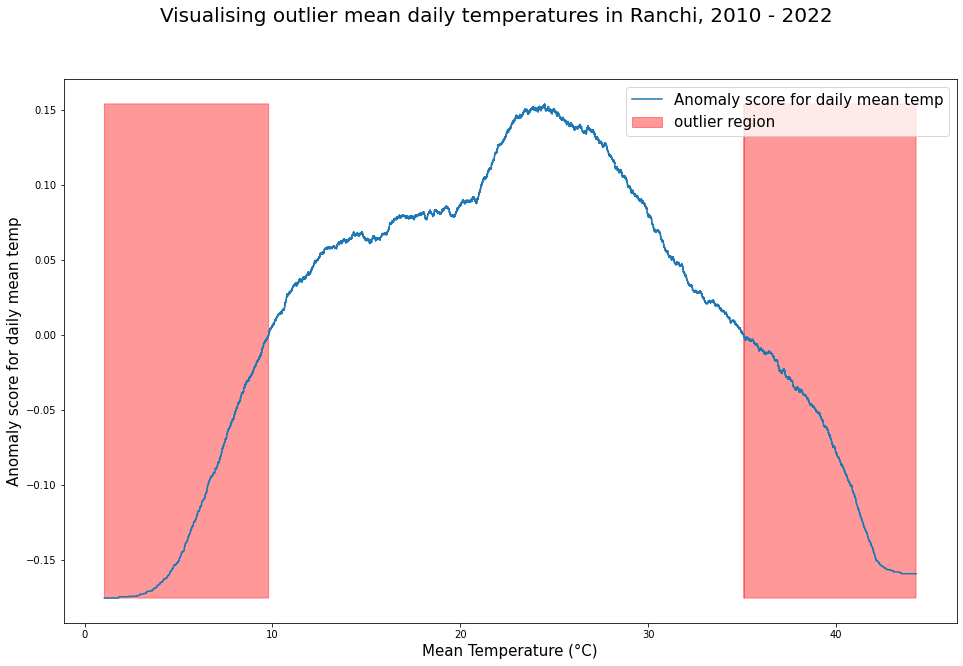

In [98]:
plt.figure(figsize=(16,10))
plt.plot(max_temp, anomaly_score_maxtemp, label='Anomaly score for daily mean temp')
plt.fill_between(max_temp.T[0], np.min(anomaly_score_maxtemp), np.max(anomaly_score_maxtemp), 
                 where=outlier_maxtemp==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend(fontsize=15)
plt.ylabel('Anomaly score for daily mean temp', fontsize=15)
plt.xlabel('Mean Temperature (°C)', fontsize=15)

plt.suptitle("Visualising outlier mean daily temperatures in Ranchi, 2010 - 2022", fontsize=20)
plt.show()

In [99]:
df[(df['T2M'] < 10) | (df['T2M'] >= 35.5)].count()[0]

10323

## MULTIVARIATE ANOMALY DETECTION USING PYOD

In [100]:
cols = ['PRECTOTCORR', 'T2M']
minmax = MinMaxScaler(feature_range=(0, 1))
df_temp[cols] = minmax.fit_transform(df_temp[cols])
df_temp[cols].head()

,PRECTOTCORR,T2M
0,0.0,0.166358
1,0.0,0.150856
2,0.0,0.136280
3,0.0,0.123785
4,0.0,0.113142


In [101]:
X1 = df_temp['PRECTOTCORR'].values.reshape(-1,1)
X2 = df_temp['T2M'].values.reshape(-1,1)

X = np.concatenate((X1,X2), axis=1)

In [102]:
import matplotlib as mpl
from pyod.models.cblof import CBLOF
from pyod.models.iforest import IForest
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN

In [103]:
outliers_fraction = 0.04

classifiers = {
    "Cluster-based Local Outlier Factor (CBLOF)": CBLOF(
        contamination=outliers_fraction, check_estimator=False, random_state=42
    ),
    "Histogram-base Outlier Detection (HBOS)": HBOS(contamination=outliers_fraction),
    "Isolation Forest": IForest(
        contamination=outliers_fraction, random_state=42, behaviour="new"
    ),
    "K Nearest Neighbors (KNN)": KNN(contamination=outliers_fraction),
}

OUTLIERS: 4205 | INLIERS: 101011 | MODEL: Cluster-based Local Outlier Factor (CBLOF)


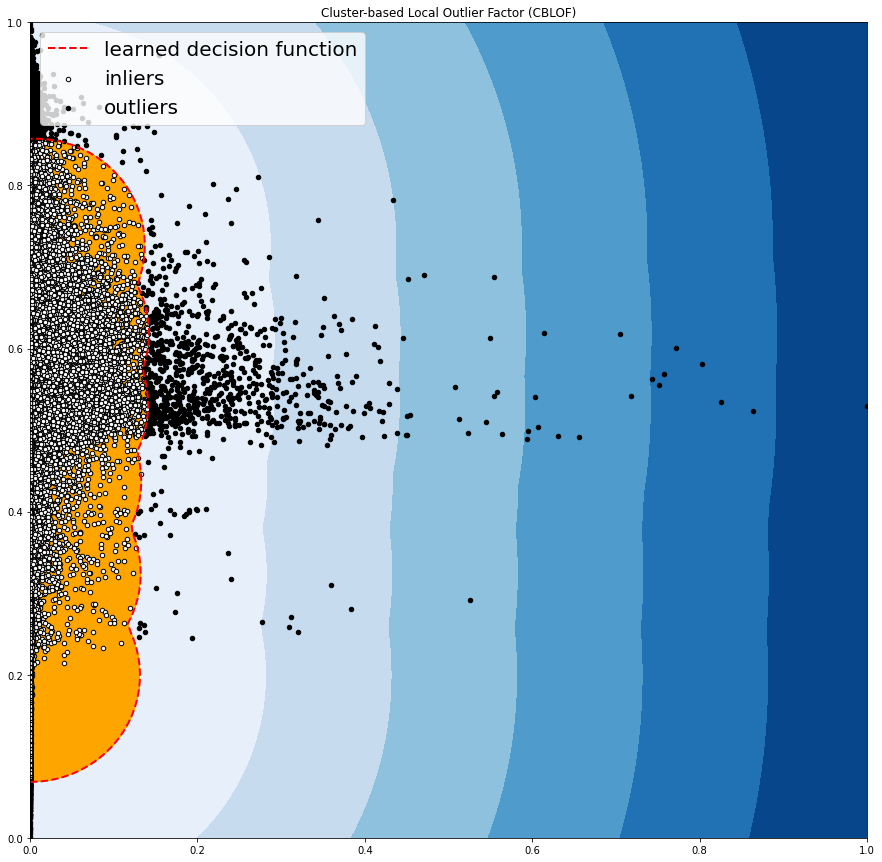

OUTLIERS: 3479 | INLIERS: 101737 | MODEL: Histogram-base Outlier Detection (HBOS)


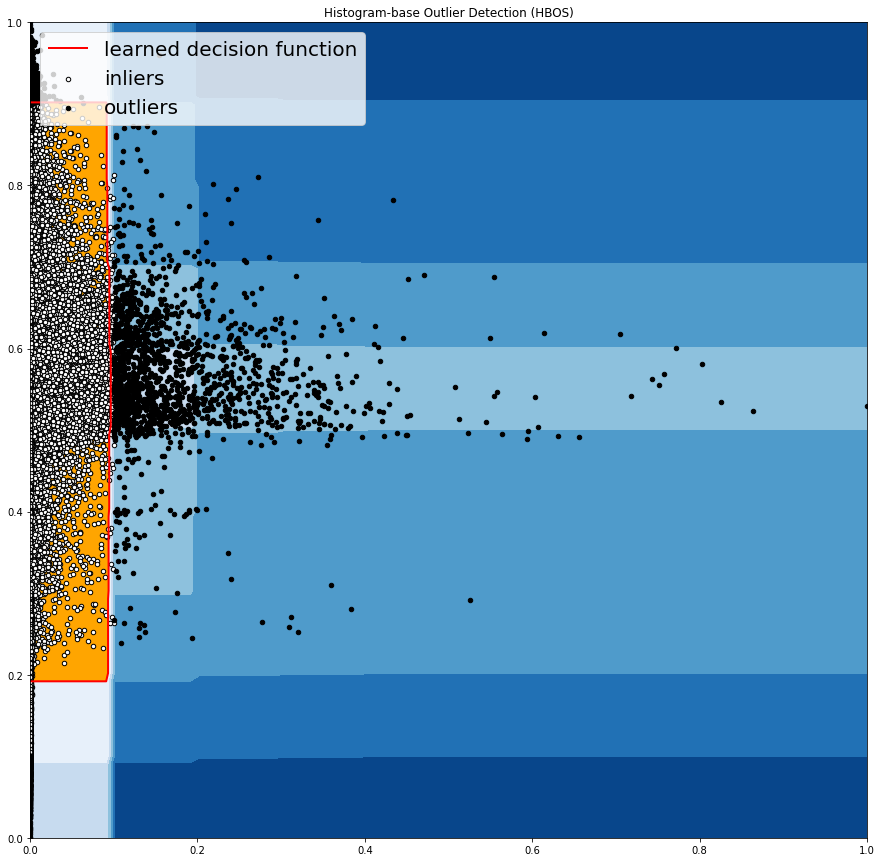

OUTLIERS: 4209 | INLIERS: 101007 | MODEL: Isolation Forest


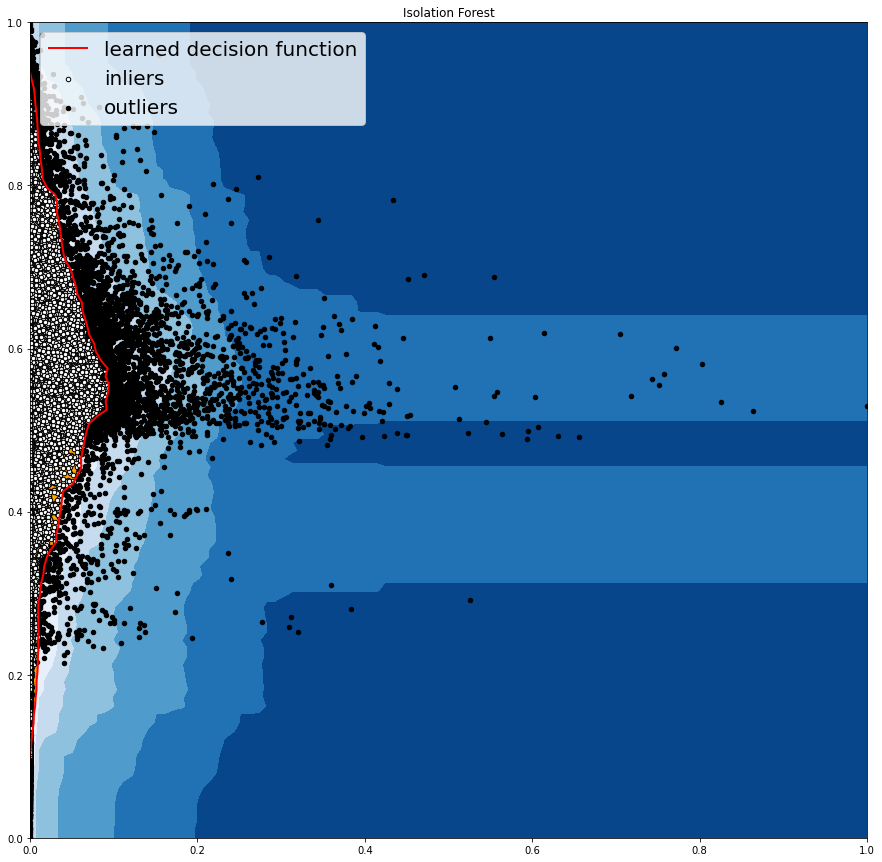

OUTLIERS: 3639 | INLIERS: 101577 | MODEL: K Nearest Neighbors (KNN)


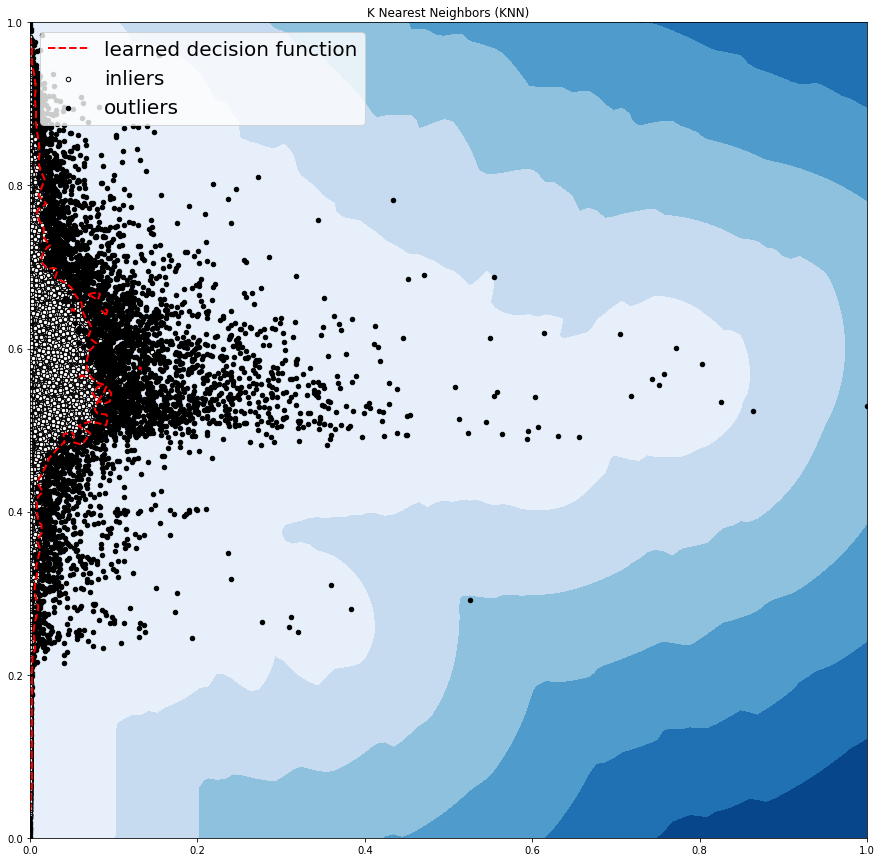

In [104]:
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
outliers = []

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    
    scores_pred = clf.decision_function(X) * -1
        
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(15, 15))
    
    df_temp_2 = df_temp.copy()
    df_temp_2['outlier'] = y_pred.tolist()
    
    outliers.append(df_temp_2.loc[df_temp_2['outlier'] == 1])
    outliers_df = pd.concat(outliers) 
    
    IN1 =  np.array(df_temp_2['PRECTOTCORR'][df_temp_2['outlier'] == 0]).reshape(-1,1)
    IN2 =  np.array(df_temp_2['T2M'][df_temp_2['outlier'] == 0]).reshape(-1,1)
     
    
    OUT1 =  df_temp_2['PRECTOTCORR'][df_temp_2['outlier'] == 1].values.reshape(-1,1)
    OUT2 =  df_temp_2['T2M'][df_temp_2['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS:',n_outliers, '|', 'INLIERS:',n_inliers, '|', 'MODEL:',clf_name)
        
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
           
    b = plt.scatter(IN1,IN2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OUT1,OUT2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=mpl.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()

In [105]:
outlier_dates = outliers_df['Datetime'].unique()
outlier_dates = np.sort(outlier_dates)[::-1]

In [106]:
raw_df = df_list['ranchi.csv']

In [107]:
abnormal_weather = raw_df[raw_df.Datetime.isin(outlier_dates)]

In [108]:
abnormal_weather.columns

Index(['PRECTOTCORR', 'RH2M', 'PS', 'WS2M', 'T2M', 'Datetime', 'Year'], dtype='object')

In [109]:
df_orig = df_list['ranchi.csv']
df_orig['Month'] = pd.DatetimeIndex(df_orig['Datetime']).month

In [110]:
print(df_orig.loc[6])
print(abnormal_weather.loc[6])
df_local = df_orig

PRECTOTCORR                    0.0
RH2M                         88.19
PS                           94.63
WS2M                          1.28
T2M                       0.096714
Datetime       2010-01-01 06:00:00
Year                          2010
Month                            1
Name: 6, dtype: object
PRECTOTCORR                    0.0
RH2M                         88.19
PS                           94.63
WS2M                          1.28
T2M                       0.096714
Datetime       2010-01-01 06:00:00
Year                          2010
Name: 6, dtype: object


In [111]:
df_local['Extreme'] = np.where(df['photos']!= '[]', True, False)

KeyError: ignored

In [ ]:
abnormal_weather.describe()

In [ ]:
abnormal_weather.describe()

In [ ]:
abnormal_weather.shape
abnormal_weather['Month'] = pd.DatetimeIndex(abnormal_weather['Datetime']).month

In [ ]:
abnormal_weather.groupby(['Year']).Month.value_counts().sort_values(ascending=False).head(20)

In [ ]:
abnormal_weather.groupby(["Year"]).Month.value_counts().sort_values(
    ascending=False
).head(20).plot(kind="bar", 
                figsize=(20, 10),
               color='#6B788D')
plt.title(
    "Distribution of Abnormal weather conditions in Ranchi, 2010 - 2022 ",
    fontsize=20,
)
plt.xlabel("Year-Month", fontsize=15)
plt.ylabel("Number of days with outlier weather", fontsize=15)
plt.show()

https://timesofindia.indiatimes.com/city/ranchi/life-thrown-out-of-gear-as-sudden-storm-lashes-ranchi/articleshow/69644412.cms
